<a href="https://colab.research.google.com/github/aluizi0/emparelhamento_grafos/blob/main/run_emparelhamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emparelhamento Estável Máximo: Alocação de Alunos em Projetos

Este projeto implementa um algoritmo de **Emparelhamento Estável Máximo** focado no problema de alocação de alunos em projetos acadêmicos. O objetivo é encontrar a melhor distribuição possível respeitando as preferências de ambas as partes (alunos e projetos/orientadores), utilizando conceitos de Teoria dos Grafos.

## Autores

| Nome | Matrícula |
| :--- | :---: |
| Aluízio Oliveira Gonçalves Filho | 202042720 |
| Dyesi Fernanda Montagner de Souza | 212008544 |
| Gustavo Henrique Alves Cezario Bastos | 202024464 |

Execução: Utilize o 'Run all' logo acima para melhor experiência.

In [ ]:
# 1) Clonar o repositório e entrar na pasta
!git clone https://github.com/aluizi0/emparelhamento_grafos.git
%cd emparelhamento_grafos

c:\Users\gonca\Documents\GitHub\projeto2-grafos\emparelhamento_grafos\emparelhamento_grafos


Cloning into 'emparelhamento_grafos'...


In [ ]:
# 2) Instalar dependências
!pip install -r requirements.txt -q


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\gonca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# 3) Executar o script principal
!python main.py

--- 1. Carregando ---
--- 2. Filtrando ---
Filtragem: 304 preferências removidas por requisitos não atendidos.
--- 3. Executando Gale-Shapley ---
Total de iterações: 224
--- 4. Gerando Visualizações ---
Gerando visualizações com layout Radial (Circular)...
Snapshots radiais salvos na pasta 'graficos'.
GIF de animação salvo em 'graficos/emparelhamento_animacao.gif'.
Matriz de emparelhamento salva em 'graficos/matriz_emparelhamento.xlsx'.
Gráfico de satisfação, ganho/perda por projeto e tabela Excel salvos.
--- 5. Verificando Estabilidade ---
Emparelhamento é estável: True
--- 6. Gerando Relatório Resumido ---
Relatório resumido salvo em 'graficos/relatorio_resumo.txt'.

--- Concluído! Verifique a pasta 'graficos'. ---


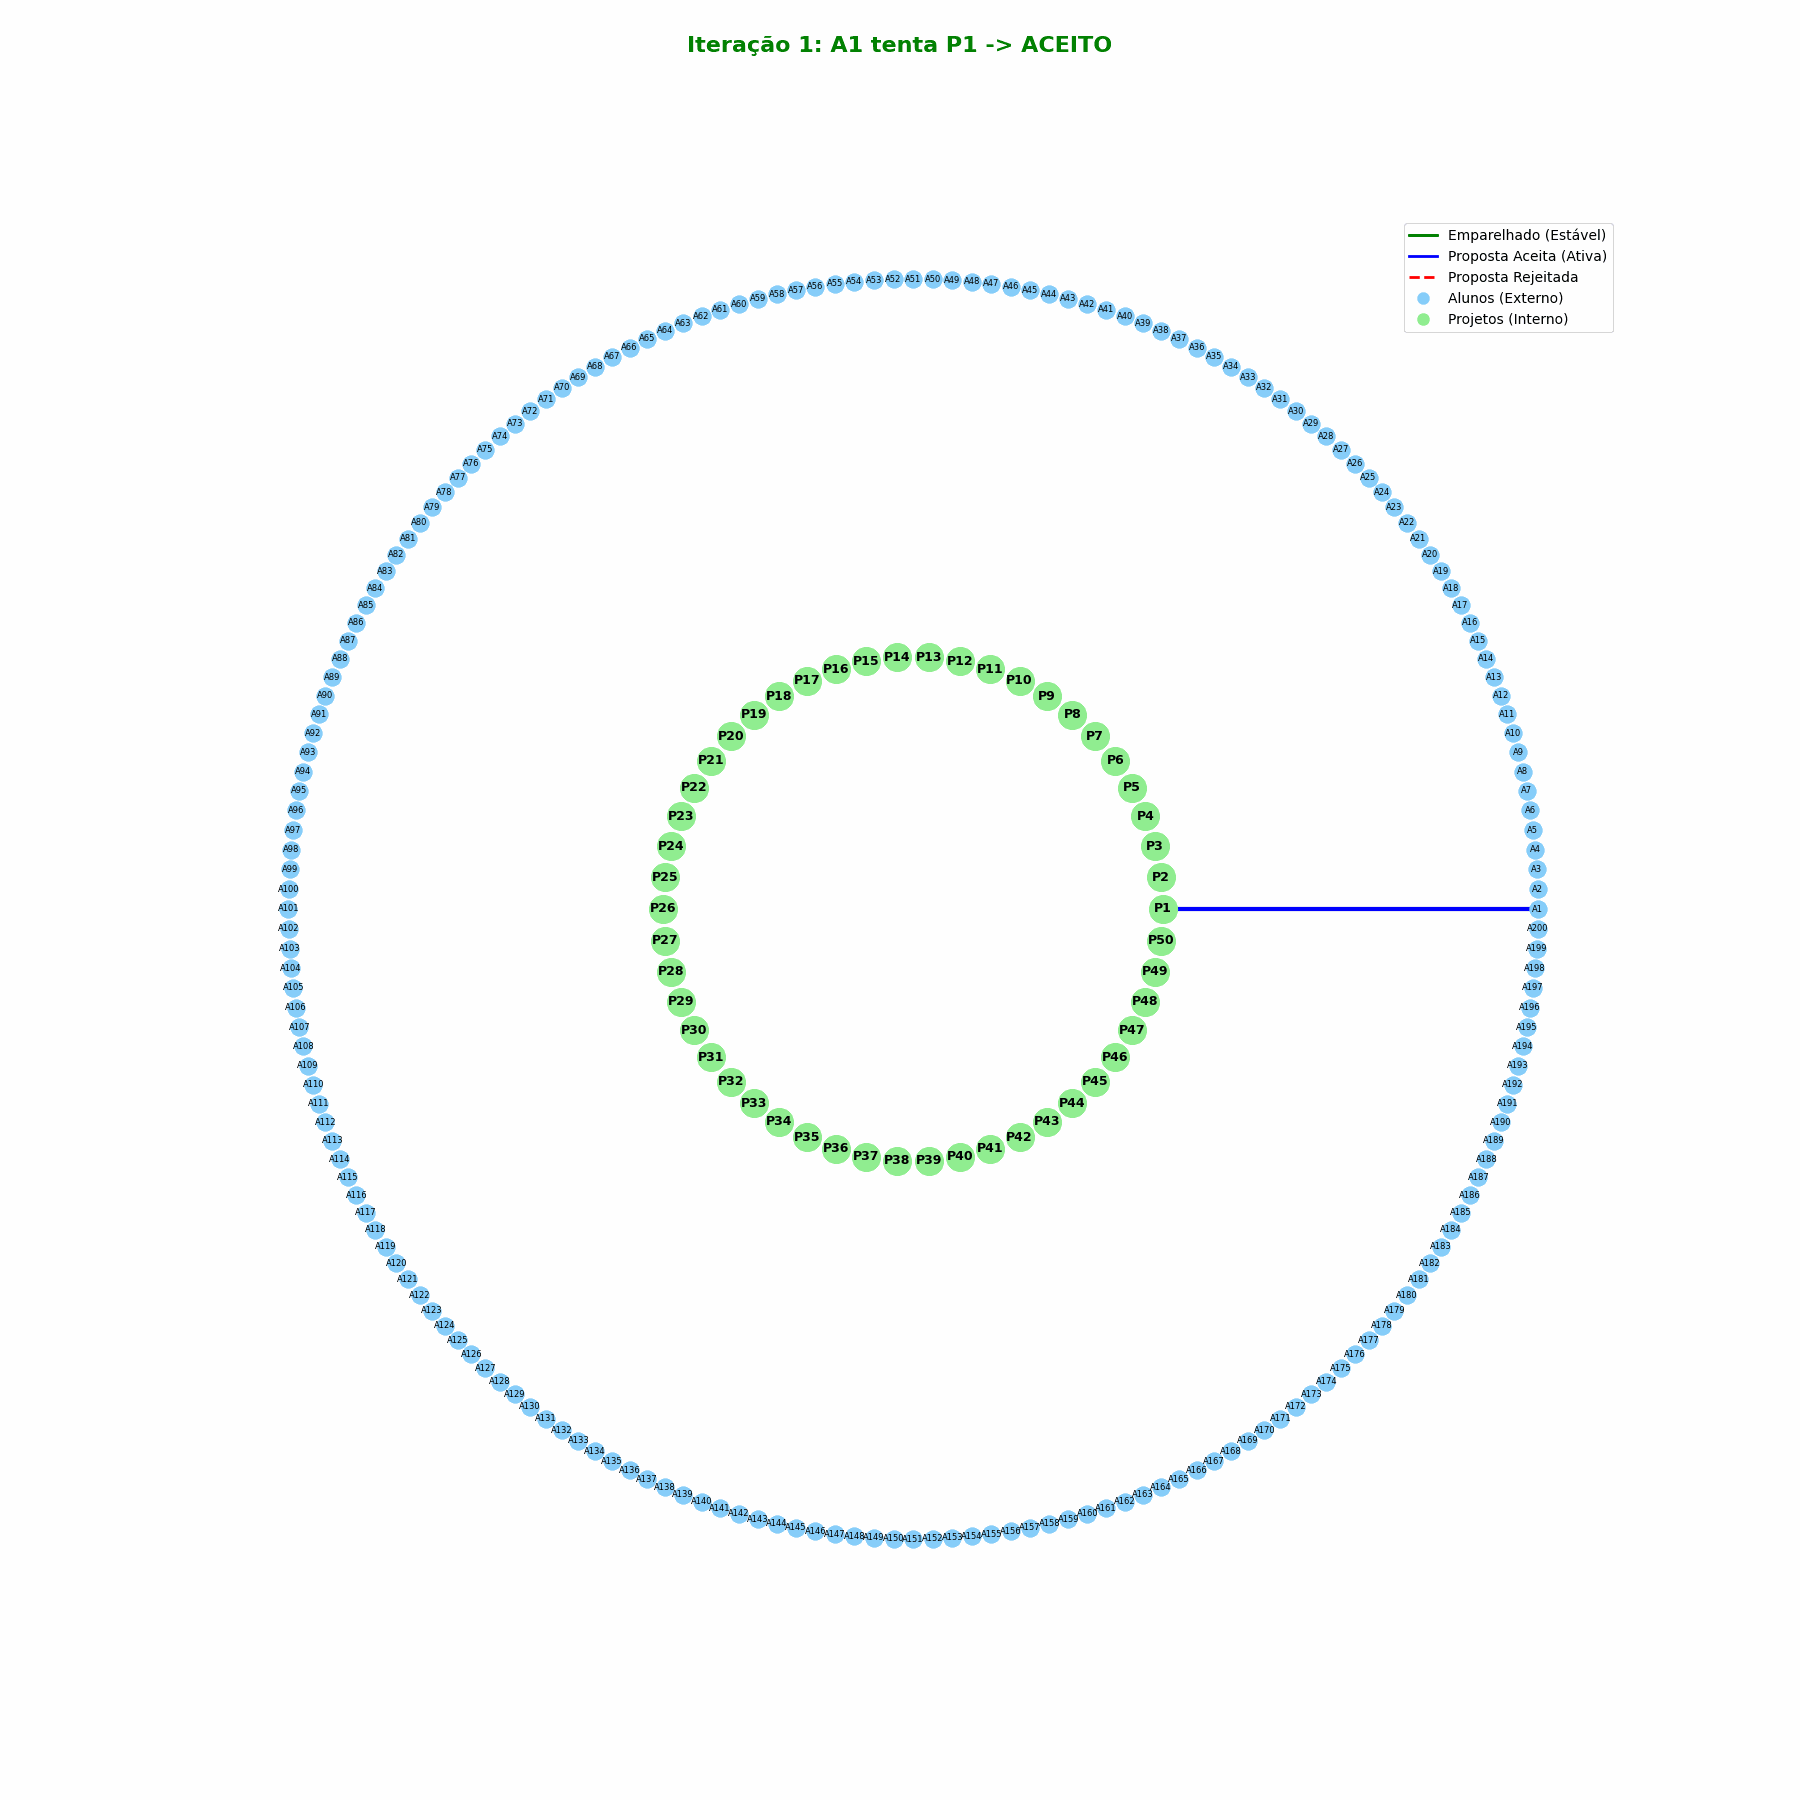

In [ ]:
import os
import glob
from IPython.display import Image, display

print("--- Galeria de Resultados (Visualização no Colab) ---")

# 1. Função para ordenar os snapshots corretamente (1, 2, ... 10)
def get_snapshot_number(filename):
    try:
        # Pega o número que está entre 'snapshot_' e '.png'
        base = os.path.basename(filename)
        number = base.split('_')[1].split('.')[0]
        return int(number)
    except:
        return 999

# 2. Localizar arquivos
snapshot_files = sorted(glob.glob('graficos/snapshot_*.png'), key=get_snapshot_number)
other_files = sorted([f for f in glob.glob('graficos/*.png') if 'snapshot' not in f])

# 3. Exibir Snapshots (Evolução)
if snapshot_files:
    print(f"\n📂 EVOLUÇÃO DO ALGORITMO ({len(snapshot_files)} passos):")
    for img_path in snapshot_files:
        # Exibe o nome do arquivo e a imagem
        print(f"\n--- {os.path.basename(img_path)} ---")
        display(Image(filename=img_path))
else:
    print("⚠️ Nenhum snapshot encontrado na pasta 'graficos/'. Rode o código do algoritmo antes.")

# 4. Exibir Gráficos Estatísticos (Satisfação, etc)
if other_files:
    print("\n\n📊 ESTATÍSTICAS FINAIS:")
    for img_path in other_files:
        print(f"\n--- {os.path.basename(img_path)} ---")
        display(Image(filename=img_path))

# 5. Exibir GIF (Animação)
gif_path = 'graficos/emparelhamento_animacao.gif'
if os.path.exists(gif_path):
    print("\n\n🎬 ANIMAÇÃO (GIF):")
    display(Image(filename=gif_path))

In [ ]:
# 5) Baixar arquivos-chave (Colab)
import os
try:
    from google.colab import files
    colab = True
except Exception:
    colab = False

files_to_download = ['graficos/resultado_final.xlsx', 'graficos/relatorio_resumo.txt']
for f in files_to_download:
    if os.path.exists(f):
        if colab:
            files.download(f)
        else:
            print(f'Arquivo pronto: {f} (faça download via painel de arquivos do notebook)')
    else:
        print(f'Missing: {f}')

Arquivo pronto: graficos/resultado_final.xlsx (faça download via painel de arquivos do notebook)
Arquivo pronto: graficos/relatorio_resumo.txt (faça download via painel de arquivos do notebook)


In [ ]:
# 4b) Exibir GIF da evolução
from IPython.display import Image, display, HTML
import os

gif = 'graficos/emparelhamento_animacao.gif'
if os.path.exists(gif):
    display(HTML("<h4>GIF da evolução do algoritmo</h4>"))
    display(Image(gif))
else:
    print('emparelhamento_animacao.gif não encontrado')

## Dicas extras
- Para salvar os resultados no seu Google Drive, monte o Drive e copie a pasta `graficos/` para lá:

```python
from google.colab import drive
drive.mount('/content/drive')
!cp -r graficos /content/drive/MyDrive/emparelhamento_graficos
```

- Se preferir rodar localmente, basta clonar o repositório e executar `python main.py` em um ambiente com as dependências instaladas.